-----

It is world known that the unsinkable ship Titanic sinked during its journey in the British Ocean. In this post, I will analyze the Titanic data through Machine Learning models and make predictions. The interesting point here is to see whether I am going to survive if I was on board.

The analysis is divided into three parts. In the first part I will unfold the data set requested from seaborn. The parameters within the data set will be described. Also, I will perform a prelimininary analysis to visualize the inner relationships amongst each variables with the target feature, which is survived or not.

In the second part, I will clean the data to make it ready for the machine learnin task.

In the third part, data set will be fitted to seven machine learning models and their prediction accuracies will be compared. Last I will test if I am able to survive from the sinking ship if I was on board.

----

If you want to know more, please check the [video link here]('https://www.youtube.com/watch?v=rODWw2_1mCI').


### Part I Data Examination

Import the dependencies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the data from seaborn package and preview the head rows.

In [2]:
titanic = sns.load_dataset('titanic')

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#### Data set descriptions

- survived: 0 means not survived and 1 means survived
- pclass: Passenger class (1=1st, 2=2nd, 3=3rd)
- sex: 0 male, 1 female
- age: age
- sibsp: number of siblings/spouses aboard
- parch: number of parents/childrenn aboard
- fare: price you paid to get on board (British pound)
- embarked: the city where you embark (C=Cherbourg; Q=Queenstown; S=Southampton)
- class: same as pclass
- adult_male: a male who is above 18 (0=No; 1=Yes)
- deck: deck of the ship
- embarked town: full name of "embarked"
- alive: survived or not
- alone: with friends, siblings, parents or children? (1=alone, 0=not alone)

In [3]:
#count the number of rows and columns in the data set
titanic.shape

(891, 15)

Get some statistics from the data set

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the column 'age', the unit is year. So the average age on board of Titanic is 29 years old. The yongest baby is 0.42 year which is about 5 month old.
The fare is the ticket fee to be paid to get on board. The unit is English Pound. So the minimum price is zero british pound. Averagely they paid 49.69 English Pounds.

In [5]:
#get the count of the number of surviors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Therefore, in totall 891 recorded individuals, there are 549 people not survived and 342 people survived from the disaster.

Visualize the number of survivors.

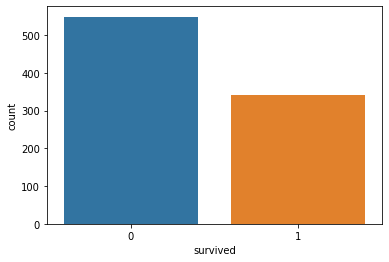

In [6]:
sns.countplot(titanic['survived'])

Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'.

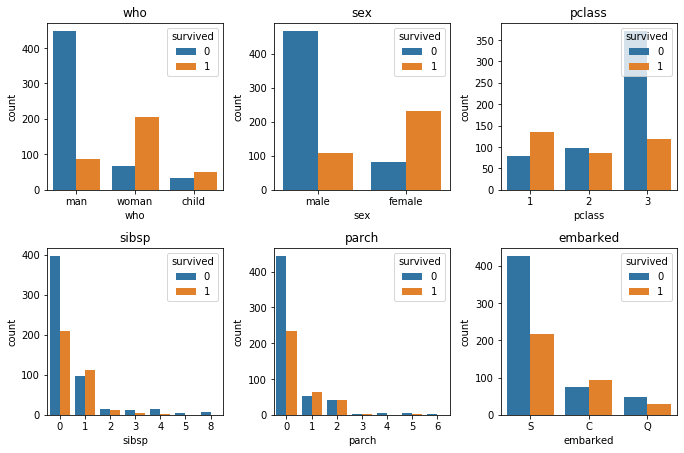

In [7]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
#make plot for all of them

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go to the number of columns
    ax = axs[r][c] #show where to position each subplot
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()

Blue bars refer to the not survived and oranges refer to the survived.

- Obviously, from the first subplot we can see that males are unlikely to survive from the sinking ship. Especially in the pclass subplot, it means if you are an adult man who lives in the 3rd class, great chances are you are not going to survive.
- Females are most likely to survive from the chart 'sex'.
- Passengers from the 3rd class are most likely not able to survive from the chart 'pclass'.
- Without siblings, spouse on board, chances are you are hard to survive.
- People aboard from South Hamspton, you have smaller chance to survive compared to people boarding from another two habors.

Next, I am going to look at the survival rate by sex.

In [8]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Look at the survival rate by sex and class

In [9]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Females have a 96.8% survival rate if they are in the first class. Chances of survival for males in the 3rd class are the lowest, 13.5% only. Meaning that most of them did not survive.

The highest survival rate of a man who has a first class tickest is even lower than females from 3rd class.

Look at the survival rate by sex and class visually.

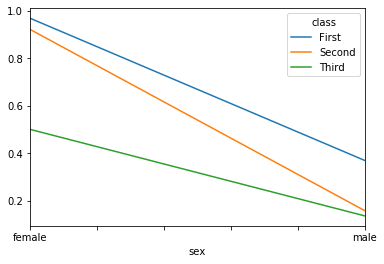

In [10]:
titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

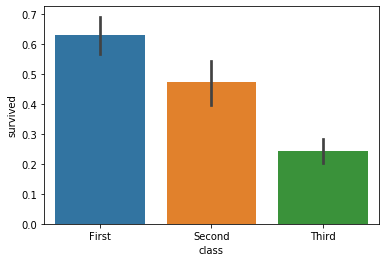

In [11]:
#plot the survival rate of each class
sns.barplot(x = 'class', y = 'survived', data = titanic)

In general, people from 1st class has the highest survival chance doesn't matter if you are female or male.

In [12]:
#Look at the survival rate by sex, age and class
age = pd.cut(titanic['age'],[0,18,80])
#80 is the maximum age in our dataset
titanic.pivot_table('survived',['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Survival rate is only 7% chance for men in the 2nd class. Adult females in the 1st class have the highest survival rate which is 97%.

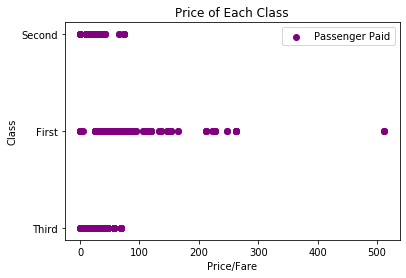

In [13]:
# plot the prices paid of each class
plt.scatter(titanic['fare'],titanic['class'],color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

Every class here people paid zero british pound, which is quite interesting. People paid more than 100 British pounds will be in the 1st class.

### Part II Data Quality

In this part I will clean and organize the data set to make it ready for the continuing Machine Learning tasks.
The first step is to check how many NaN values in each column. Then rows contain NaN values will be dropped out. So, count the empty values in each column.

In [14]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are 688 rows missing the data for 'Deck', which is 688/891 = 77.22% of the whole data set. Therefore I decide to drop this column.

In [15]:
#look at all of the values in each column, get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [16]:
#remove the rows with missing values
titanic = titanic.dropna(subset = ['embarked','age'])

In [17]:
#drop the columns
titanic = titanic.drop(['deck','embark_town','alive','class',
                        'who','alone','adult_male'],
                        axis = 1)
#overlapping columns (correlated)

In [18]:
#count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [19]:
#look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In order to fit the data to the Machine learning models, data types other than integer/float will be transformed to a number. So the column 'sex' and 'embarked' need to be transformed.
Print the unique values in the columns.

In [20]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Change the non-numeric data to numeric data, and print the new values.

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#Encode the embark column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [22]:
#print the unique values in the columns
#transformed data types to integers
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [23]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

### Part III Fit Machine Learning Models

Split data into independent 'x' and dependent 'y' variables.

In [24]:
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

Split the data set into 80% training and 20% testing.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state = 0)

In [26]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Create a function with many machine learning models. I will be using 7 models to fit the data set individually, and compare their prediction accuracy to see which model scores the highest in this task. They are 
1) Logistic Regression, 

2) K neighbors, 

3) Support Vector Classifier (linear kernel), 

4) Support Vector Classifier (RBF kernel), 

5) Gaussian NB, 

6) Decision Tree, and 

7) RandomForest Classifier.

In [27]:
def models(X_train, Y_train):

  #use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #use K neighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #use Support Vector Classifier (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state=0)
  svc_rbf.fit(X_train, Y_train)

  #use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB() 
  gauss.fit(X_train, Y_train)

  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
  forest.fit(X_train, Y_train)

  #print the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

Check the prediction accuracy on the training data of each model.

In [28]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


Model Decision Tree scores highest on the training data which 99%, followed by Random Forest model 97.5%

In [29]:
#show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #Extract TN (True Negative), FP (False Positive), FN (False Negative), TP (True Positive)
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



Model 6, Random Forest classifier scores highest in the testing data, which is 83.9& approximately. Furthermore, to get the feature importance so we would know which parameter contributes most to the target feature.

In [30]:
#get feature importance
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 
                            'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


So we can see that the feature 'age' scores highest, that means the age of the passenger determines most whether he/she can survive at last. The second one is 'fare' - how much did the passenger pay to get on board. The least important feature is 'embarked' that means it is not that important where did the passenger embark to determine if he/she can survive.

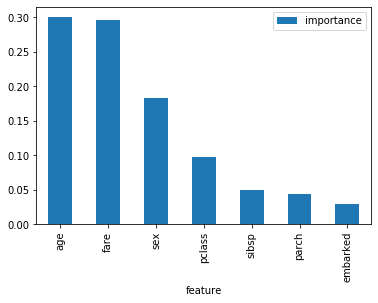

In [31]:
#Visualize the importance
importances.plot.bar()

In [32]:
#print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()
#print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


Top is the model prediction.

Bottom is actual data.

Now I am going to test the survival rate on myself. If I was on the ship that day, would I survive from the sinking ship? First I am going to describe myself into the following features:

- pclass: 2nd

I am pretty sure that I won't pay too much to get on the 1st class, second class it the medium choice which is not too expensive. Compared to the 3rd class, I won't share the room with a lot of other people who I don't know at all if staying in 2nd class.

- sex: female
- age: 25
- sibsp: 0
- parch: 0
- fare: 80 pounds
- embarked: 2

In [33]:
my_survival = [[1, 0, 10, 2, 2, 300, 1]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Sorry to say, you did not make it.')
else:
  print('Lucky you! You survived!')

[0]
Sorry to say, you did not make it.


oops... I did not make it